In [6]:
import numpy as np
import pandas as pd

def jack(F, X):
    h = 0.000001
    arr1 = []
    for i in range(len(F)):
        arr2 = []
        for j in range(len(X)):
            lhsx = X.copy()
            lhsx[j] += h
            rhsx = X.copy()
            rhsx[j] -= h
            arr2.append((F[i](lhsx)-F[i](rhsx))/(2*h))
        arr1.append(arr2)
    return np.array(arr1)

def F_numerical(F,X):
    arr = [[j(X)] for j in F]
    return np.array(arr)


def main(F, x_ini = None, range_ = [1,5], max_itr = 100, epsilon = 0.0000001, precision = 15):
    if x_ini == None:
        initial = np.random.uniform(range_[0], range_[1],len(F))
    else :
        initial = np.array(x_ini)
    n = len(F)
    print('Initial value taken as \n', initial, '\n')
    
    #third order
    X = initial.copy()
    ct = 1
    third_order_cache = []
    while np.linalg.norm(F_numerical(F,X)) > epsilon and ct < max_itr :
        #print(' itr_ct = ', ct,'\n','Soln = ',X)
        third_order_cache.append(np.linalg.norm(F_numerical(F,X)))
        x_k = np.array([[i] for i in X])
        y_k = x_k - 0.5*np.linalg.inv(jack(F,X))@F_numerical(F,X)
        Y = np.squeeze(y_k)
        X = np.squeeze(x_k - np.linalg.inv(jack(F,Y))@F_numerical(F,X))
        ct += 1
    print('For Third order model Solution is ', '\n', [round(i,precision) for i in X],'\n')
    third_order_cache.append(np.linalg.norm(F_numerical(F,X)))
    
    
    #modified third order
    X = initial.copy()
    ct = 1
    modified_third_order_cache = []
    while np.linalg.norm(F_numerical(F,X)) > epsilon and ct < max_itr :
        
        modified_third_order_cache.append(np.linalg.norm(F_numerical(F,X)))
        x_k = np.array([[i] for i in X])
        jacobian = jack(F,X)
        
        a = True
        while a:
            f_x = np.squeeze(F_numerical(F,X))
        
            lambd = np.random.uniform(-0.01,0.01,n)
            for i in range(n):
                if f_x[i]*jacobian[i,i] >= 0:
                    lambd[i] = abs(lambd[i])
                elif f_x[i]*jacobian[i,i] < 0:
                    lambd[i] = -abs(lambd[i])

            try :
                b = np.linalg.inv(np.diag(lambd*f_x)+jack(F,X))
                a = False
            except :
                pass
            
        y_k = x_k - 0.5*b@F_numerical(F,X)
        Y = np.squeeze(y_k)
        
        a = True
        while a:
            mu = np.random.uniform(-0.01, 0.01, n)
            for i in range(n):
                if jacobian[i,i] >= 0:
                    mu[i] = abs(mu[i])
                elif jacobian[i,i] < 0:
                    mu[i] = -abs(mu[i])                
            try :
                c = np.linalg.inv(np.diag(mu*f_x*f_x)+jack(F,Y))
                a = False
            except :
                pass
        
        X = np.squeeze(x_k - c@F_numerical(F,X))
        ct += 1
    modified_third_order_cache.append(np.linalg.norm(F_numerical(F,X)))
    print('For Modified Third order model Solution is ', '\n', [round(i,precision) for i in X],'\n')
    
    
    #sixth order
    try:
        X = initial.copy()
        ct = 1
        sixth_order_cache = []
        while np.linalg.norm(F_numerical(F,X)) > epsilon and ct < max_itr :
            sixth_order_cache.append(np.linalg.norm(F_numerical(F,X)))
            x_k = np.array([[i] for i in X])
            y_k = x_k - np.linalg.inv(jack(F,X))@F_numerical(F,X)
            Y = np.squeeze(y_k)
            z_k = y_k - np.linalg.inv(jack(F,X))@(2*np.eye(len(F)) - jack(F,Y)\
                                @np.linalg.inv(jack(F,X)))@F_numerical(F,Y)
            Z = np.squeeze(z_k)
            X = np.squeeze(z_k - np.linalg.inv(jack(F,Y))@F_numerical(F,Z))
            ct += 1
        print('For Sixth order model Solution is ','\n', [round(i,precision) for i in X],'\n')
        sixth_order_cache.append(np.linalg.norm(F_numerical(F,X)))
    except:
        print('error in sixth order \n')
    
    
    #fifth order
    X = initial.copy()
    ct = 1
    fifth_order_cache = []
    while np.linalg.norm(F_numerical(F,X)) > epsilon and ct < max_itr :
        fifth_order_cache.append(np.linalg.norm(F_numerical(F,X)))
        x_k = np.array([[i] for i in X])
        y_k = x_k - np.linalg.inv(jack(F,X))@F_numerical(F,X)
        Y = np.squeeze(y_k)
        z_k = x_k - 2*np.linalg.inv(jack(F,X)+jack(F,Y))@F_numerical(F,X)
        Z = np.squeeze(z_k)
        X = np.squeeze(z_k - np.linalg.inv(jack(F,Y))@F_numerical(F,Z))
        ct += 1
    fifth_order_cache.append(np.linalg.norm(F_numerical(F,X)))
    print('For Fifth order model Solution is ', '\n', [round(i,precision) for i in X], '\n')
    
    
    #proposed model 
    #modified fifth order
    X = initial.copy()
    ct = 1
    modified_fifth_order_cache = []
    while np.linalg.norm(F_numerical(F,X)) > epsilon and ct < max_itr :
        
        modified_fifth_order_cache.append(np.linalg.norm(F_numerical(F,X)))
        x_k = np.array([[i] for i in X])
        jacobian = jack(F,X)
        
        a = True
        while a:
            f_x = np.squeeze(F_numerical(F,X))
        
            lambd = np.random.uniform(-1,1,n)
            for i in range(n):
                if f_x[i]*jacobian[i,i] >= 0:
                    lambd[i] = abs(lambd[i])
                elif f_x[i]*jacobian[i,i] < 0:
                    lambd[i] = -abs(lambd[i])

            try :
                b = np.linalg.inv(np.diag(lambd*f_x)+jack(F,X))
                a = False
            except :
                pass
            
        y_k = x_k - 0.5*b@F_numerical(F,X)
        Y = np.squeeze(y_k)
        
        a = True
        while a:
            mu = np.random.uniform(-0.01, 0.01, n)
            for i in range(n):
                if jacobian[i,i] >= 0:
                    mu[i] = abs(mu[i])
                else:
                    mu[i] = -abs(mu[i])                
            try :
                c = np.linalg.inv(np.diag(mu*f_x*f_x)+jack(F,Y)+jack(F,X))
                a = False
            except :
                pass
        
        z_k = x_k - 2*c@F_numerical(F,X)
        Z = np.squeeze(z_k)
        
        jacobian = jack(F,Y)
        a = True
        while a:
            f_y = np.squeeze(F_numerical(F,Y))
        
            eta = np.random.uniform(-1,1,n)
            for i in range(n):
                if f_y[i]*jacobian[i,i] >= 0:
                    eta[i] = abs(eta[i])
                else:
                    eta[i] = -abs(eta[i])

            try :
                b = np.linalg.inv(np.diag(eta*f_y)+jack(F,Y))
                a = False
            except :
                pass
            
        X = np.squeeze(z_k - b@F_numerical(F,Z))
        ct += 1
    modified_fifth_order_cache.append(np.linalg.norm(F_numerical(F,X)))
    print('For Modified Proposed Fifth order model Solution is ', '\n', [round(i,precision) for i in X],'\n')
    
    return [third_order_cache,modified_third_order_cache, fifth_order_cache, \
            modified_fifth_order_cache, sixth_order_cache], X
    
def convergence_viewer(li):
    pad = len(max(li, key=len))
    data_df = np.array([i + [0]*(pad-len(i)) for i in li])
    df = pd.DataFrame(data_df.T, columns=['3rd', 'mod_3rd', '5th', 'mod_5th', '6th'])
    df.plot(figsize = (10,10))
    return df

Initial value taken as 
 [3.88384409 3.17785395] 

For Third order model Solution is  
 [0.5, 0.866] 

For Modified Third order model Solution is  
 [0.5, 0.866] 

For Sixth order model Solution is  
 [0.5, 0.866] 

For Fifth order model Solution is  
 [0.5, 0.866] 

For Modified Proposed Fifth order model Solution is  
 [0.5, 0.866] 



,3rd,mod_3rd,5th,mod_5th,6th
0,2.479734e+01,2.479734e+01,2.479734e+01,2.479734e+01,2.479734e+01
1,2.531506e+00,8.646713e+00,1.010488e+00,4.304344e+00,9.298710e-01
2,1.711233e-01,1.180935e+00,6.686548e-03,4.817491e-01,4.051065e-03
3,1.304087e-03,4.582455e-02,6.361230e-12,6.468591e-03,7.458352e-15
4,1.102820e-09,3.599009e-05,0.000000e+00,8.189743e-08,0.000000e+00
5,0.000000e+00,2.433694e-14,0.000000e+00,0.000000e+00,0.000000e+00


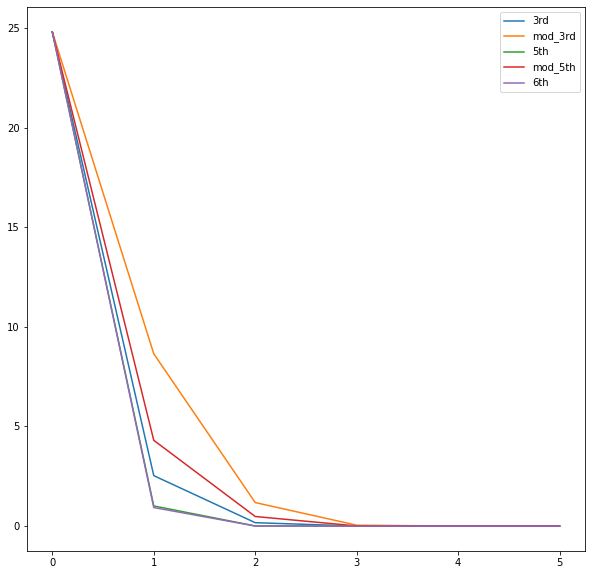

In [7]:
# Ex 1
##############################################
# define function here

def f1(x):
    val = x[0]**2 + x[1]**2 - 1
    return val
def f2(x):
    val = x[0]**2 - x[1]**2 + 0.5
    return val

F = [f1,f2]
##############################################
   
    
li,_ = main(F, precision= 3)
convergence_viewer(li)

For Third order model Solution is  
 [1.0, 2.0] 

For Modified Third order model Solution is  
 [1.0, 2.0] 

For Sixth order model Solution is  
 [1.0, 2.0] 

For Fifth order model Solution is  
 [1.0, 2.0] 

For Modified Proposed Fifth order model Solution is  
 [1.0, 2.0] 



,3rd,mod_3rd,5th,mod_5th,6th
0,1.657181e+02,1.657181e+02,1.657181e+02,1.657181e+02,165.718066
1,2.019129e+01,9.058662e+01,9.181836e+00,3.631962e+01,8.316252
2,1.127421e+00,3.549730e+01,2.615768e-02,4.294114e+00,0.011317
3,1.690964e-03,8.085404e+00,1.928820e-13,3.457238e-02,0.000000
4,1.038232e-11,5.265044e-01,0.000000e+00,3.284655e-08,0.000000
5,0.000000e+00,3.819864e-04,0.000000e+00,0.000000e+00,0.000000
6,0.000000e+00,2.142260e-13,0.000000e+00,0.000000e+00,0.000000


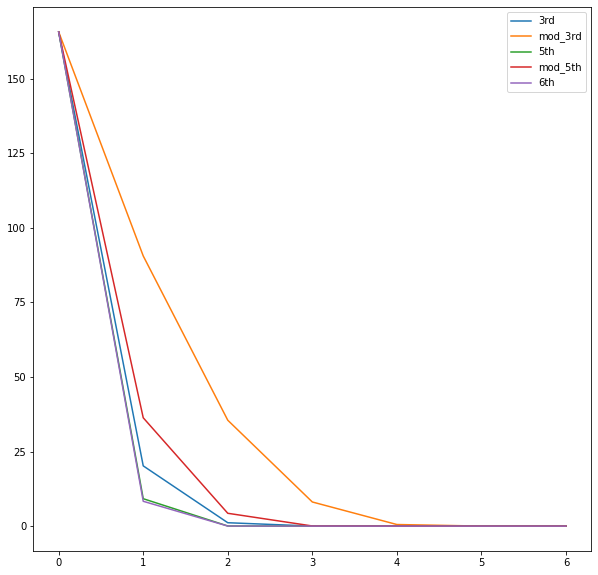

In [77]:
# Ex 2
##############################################
# define function here

def f1(x):
    val = x[0]**3 + x[0]*x[1]**2 - 5
    return val
def f2(x):
    val = x[1]*x[0]**2 + x[1]**3 - 10
    return val

F = [f1,f2]
##############################################
   
    
li,_ = main(F, precision= 3)
convergence_viewer(li)

For Third order model Solution is  
 [29.50459287038079, 17.072827612127334, 10.878791998143722, 4.70618077240136, 2.139258782059838] 

For Modified Third order model Solution is  
 [22.860479187046177, 18.169260988188032, 17.77115388961285, 16.99617191066786, 24.534484992353157] 

For Sixth order model Solution is  
 [29.5045928703808, 17.072827612127334, 10.878791998143722, 4.70618077240136, 2.13925878205984] 

For Fifth order model Solution is  
 [29.504592870380797, 17.072827612127334, 10.878791998143722, 4.70618077240136, 2.139258782059843] 

For Modified Proposed Fifth order model Solution is  
 [29.5045928703808, 17.072827612127327, 10.878791998143722, 4.70618077240136, 2.139258782059841] 



,3rd,mod_3rd,5th,mod_5th,6th
0,3.434531e+19,3.434531e+19,3.434531e+19,3.434531e+19,3.434531e+19
1,6.051494e+18,3.434531e+19,3.704387e+18,1.418748e+19,3.483916e+18
2,1.066046e+18,3.434531e+19,3.995631e+17,9.230033e+18,3.534403e+17
3,1.877706e+17,3.434531e+19,4.308446e+16,6.052368e+18,3.584238e+16
4,3.307572e+16,3.434531e+19,4.638625e+15,2.387137e+18,3.628326e+15
5,5.820162e+15,3.434531e+19,4.980347e+14,7.199804e+17,3.662468e+14
6,1.022483e+15,3.434531e+19,5.331136e+13,2.358342e+17,3.683472e+13
7,1.794452e+14,3.434531e+19,5.677170e+12,1.210483e+17,3.683382e+12
8,3.142241e+13,3.434531e+19,6.003253e+11,6.280178e+16,3.654231e+11
9,5.486835e+12,3.434531e+19,6.289163e+10,1.798954e+16,3.587595e+10


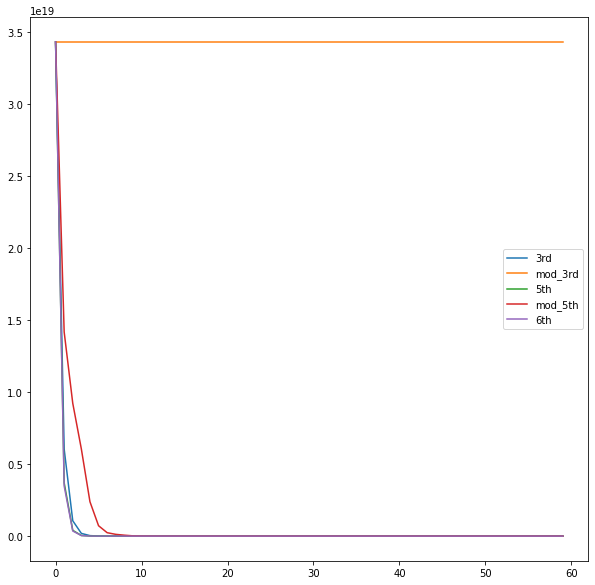

In [85]:
# Ex 3
##############################################
# define function here

beta_i = [1.2, 1.1, 1, 0.8, 0.6]
n_i = [10,8,6,4,2]
L_i = [5]*5

def f1(x):
    ind = 0
    f = n_i[ind] + (L_i[ind]*x[ind])**(1/beta_i[ind]) - (5000/sum(x))**(1/1.1)\
            - x[ind]*((5000/sum(x))**(1/1.1))/(sum(x)*1.1)
    val = (f - x[ind])**6 - (f*abs(f))**3 - (x[ind]*abs(x[ind]))**3
    return val

def f2(x):
    ind = 1
    f = n_i[ind] + (L_i[ind]*x[ind])**(1/beta_i[ind]) - (5000/sum(x))**(1/1.1)\
            - x[ind]*((5000/sum(x))**(1/1.1))/(sum(x)*1.1)
    val = (f - x[ind])**6 - (f*abs(f))**3 - (x[ind]*abs(x[ind]))**3
    return val

def f3(x):
    ind = 2
    f = n_i[ind] + (L_i[ind]*x[ind])**(1/beta_i[ind]) - (5000/sum(x))**(1/1.1)\
            - x[ind]*((5000/sum(x))**(1/1.1))/(sum(x)*1.1)
    val = (f - x[ind])**6 - (f*abs(f))**3 - (x[ind]*abs(x[ind]))**3
    return val

def f4(x):
    ind = 3
    f = n_i[ind] + (L_i[ind]*x[ind])**(1/beta_i[ind]) - (5000/sum(x))**(1/1.1)\
            - x[ind]*((5000/sum(x))**(1/1.1))/(sum(x)*1.1)
    val = (f - x[ind])**6 - (f*abs(f))**3 - (x[ind]*abs(x[ind]))**3
    return val

def f5(x):
    ind = 4
    f = n_i[ind] + (L_i[ind]*x[ind])**(1/beta_i[ind]) - (5000/sum(x))**(1/1.1)\
            - x[ind]*((5000/sum(x))**(1/1.1))/(sum(x)*1.1)
    val = (f - x[ind])**6 - (f*abs(f))**3 - (x[ind]*abs(x[ind]))**3
    return val

F = [f1,f2,f3,f4,f5]
##############################################
   
    
li,_ = main(F, range_=[15,25], max_itr= 60, epsilon = 0.00001, precision = 15)
convergence_viewer(li).head(15)

In [11]:
st = '29.504592870380797, 17.072827612127334, 10.878791998143724, 4.70618077240136, 2.13925878205984'
x = [float(i) for i in st.split(', ') ]
F_numerical(F,x), np.linalg.norm(F_numerical(F,x))

(array([[1.31130219e-06],
        [6.33299351e-08],
        [0.00000000e+00],
        [1.27329258e-11],
        [2.13162821e-12]]),
 1.3128305684217488e-06)

Initial value taken as 
 [ 9.79211712 32.47521715 32.53112553 48.06059311 47.96327614 16.68008678
  9.65903769 16.90587748 29.49077033 33.01842363] 

For Third order model Solution is  
 [0.24, -0.0, 1.635, 3.846, 0.0, 0.0, 17.404, 0.0, 0.0, 6.442] 

For Modified Third order model Solution is  
 [28.116, 5.855, 1.323, 15.631, -447.98, 0.024, 36.292, 20.865, 23.418, -0.0] 

For Sixth order model Solution is  
 [0.24, 0.0, 1.635, 3.846, -0.0, 0.0, 17.404, 0.0, -0.0, 6.442] 

For Fifth order model Solution is  
 [0.24, 0.0, 1.635, 3.846, -0.0, 0.0, 17.404, 0.0, -0.0, 6.442] 

For Modified Proposed Fifth order model Solution is  
 [-1496.191, 548.58, 14471.452, 541.599, -499.06, -0.0, 0.0, -0.0, 0.0, -0.0] 



,3rd,mod_3rd,5th,mod_5th,6th
0,8.900263e+03,8900.262697,8.900263e+03,8900.262697,8.900263e+03
1,3.170000e+02,8710.123993,8.560316e+01,8719.532152,7.884195e+01
2,2.403419e+01,8520.791684,1.769116e-02,12159.822001,1.721369e-02
3,2.580590e-01,8455.089238,4.214128e-15,15022.744811,8.881937e-15
4,6.988498e-06,8385.157594,0.000000e+00,16996.335184,0.000000e+00
5,1.065739e-14,8305.428635,0.000000e+00,23441.518216,0.000000e+00
6,0.000000e+00,8229.719080,0.000000e+00,31037.074247,0.000000e+00
7,0.000000e+00,8120.769091,0.000000e+00,31493.650263,0.000000e+00
8,0.000000e+00,8191.027681,0.000000e+00,32426.476676,0.000000e+00
9,0.000000e+00,7916.730973,0.000000e+00,40187.959415,0.000000e+00


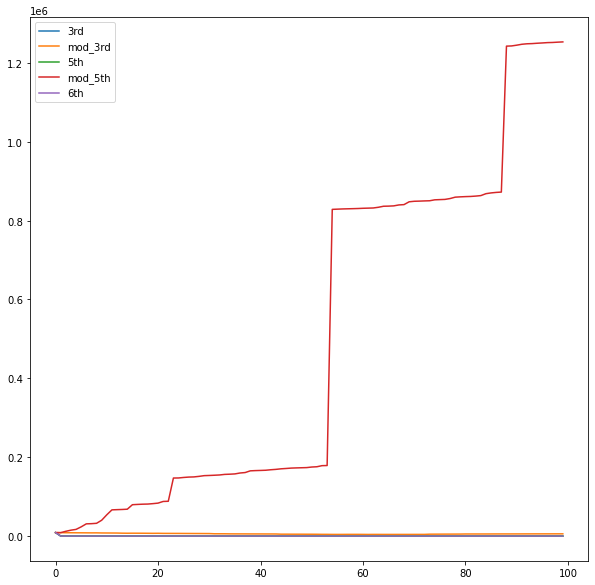

In [9]:
# LCP problem 1
##############################################
# define function here

st = 'Problem1_5x5.csv'
df1 = pd.read_csv(st, header=None)
A = np.array(df1.iloc[:,:-1])
q = np.array(df1.iloc[:,-1:])
n1 = len(q)


def f1(x):
    ind = 0
    b = np.squeeze(A[ind])
    val = np.dot(b,x[:n1]) + q[ind] - x[n1 + ind]
    return val[0]
def f2(x):
    ind = 1
    b = np.squeeze(A[ind])
    val = np.dot(b,x[:n1]) + q[ind] - x[n1 + ind]
    return val[0]
def f3(x):
    ind = 2
    b = np.squeeze(A[ind])
    val = np.dot(b,x[:n1]) + q[ind] - x[n1 + ind]
    return val[0]
def f4(x):
    ind = 3
    b = np.squeeze(A[ind])
    val = np.dot(b,x[:n1]) + q[ind] - x[n1 + ind]
    return val[0]
def f5(x):
    ind = 4
    b = np.squeeze(A[ind])
    val = np.dot(b,x[:n1]) + q[ind] - x[n1 + ind]
    return val[0]
def f6(x): return x[n1 + 0]*x[0]
def f7(x): return x[n1 + 1]*x[1]
def f8(x): return x[n1 + 2]*x[2]
def f9(x): return x[n1 + 3]*x[3]
def f10(x): return x[n1 + 4]*x[4]

F = [f1,f2,f3,f4,f5,f6,f7,f8,f9,f10]
##############################################
   
    
li,_ = main(F, range_=[5,50], epsilon= 0.000001, precision= 3)
convergence_viewer(li).head(10)